<a href="https://colab.research.google.com/github/jinxing150/urbansound8k/blob/main/train2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler

In [ ]:
pip install tensorflow


In [ ]:
import os
import librosa
import librosa.display
import glob 
import skimage
from pathlib import Path


OSError: cannot load library 'c:\Users\raabi\anaconda3\lib\site-packages\_soundfile_data\libsndfile64bit.dll': error 0x7e

In [ ]:
pd.read_csv("C:/UrbanSound8K/metadata/UrbanSound8K.csv")



FileNotFoundError: [Errno 2] No such file or directory: 'C:/UrbanSound8K/metadata/UrbanSound8K.csv'

In [ ]:
download_path = Path.cwd()/'UrbanSound8K'


df = pd.read_csv(r"C:\UrbanSound8K\\metadata\\UrbanSound8K.csv")
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [ ]:
dat1, sampling_rate1 = librosa.load("C:/UrbanSound8K/audio/fold4/344-3-4-0.wav")
dat2, sampling_rate2 = librosa.load("C:/UrbanSound8K/audio/fold8/6984-1-0-0.wav")

Text(0.5, 1.0, 'Spectogram')

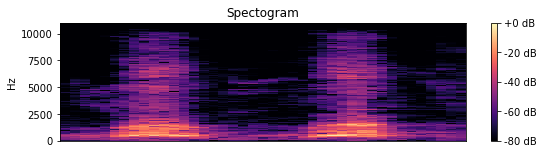

In [ ]:
plt.figure(figsize=(20, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(dat1)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectogram')

Text(0.5, 1.0, 'Spectrogram')

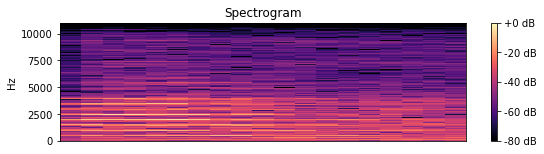

In [ ]:
plt.figure(figsize=(20, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(dat2)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')

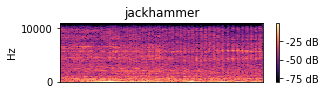

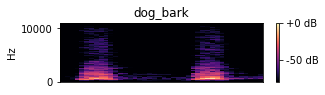

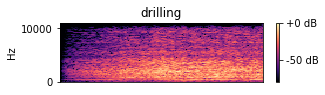

In [ ]:

arr = np.array(df["slice_file_name"])
fold = np.array(df["fold"])
cla = np.array(df["class"])

for i in range(192, 197, 2):
    path = "C:/UrbanSound8K/audio/fold" + str(fold[i]) + '/' + arr[i]
    data, sampling_rate = librosa.load(path)
    plt.figure(figsize=(10, 5))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
    plt.subplot(4, 2, 1)
    librosa.display.specshow(D, y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title(cla[i])

In [ ]:
dat1, sampling_rate1 = librosa.load("C:/UrbanSound8K/audio/fold8/7390-9-0-3.wav")
arr = librosa.feature.melspectrogram(y=dat1, sr=sampling_rate1)
arr.shape

(128, 173)

In [ ]:
feature = []
label = []

def parser(row):
    
    for i in range(8732):
        file_name = "C:/UrbanSound8K/audio/fold" + str(df["fold"][i]) + '/' + df["slice_file_name"][i]
        X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mels = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)        
        feature.append(mels)
        label.append(df["classID"][i])
    return [feature, label]

temp 

In [ ]:
temp = np.array(temp)
data = temp.transpose()


NameError: name 'temp' is not defined

In [ ]:
X_ = data[:, 0]
Y = data[:, 1]
print(X_.shape, Y.shape)
X = np.empty([8732, 128])

NameError: name 'data' is not defined

In [ ]:
for i in range(8732):
    X[i] = (X_[i])

NameError: name 'X_' is not defined

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
Y = to_categorical(Y)

NameError: name 'Y' is not defined

In [ ]:
print(X.shape)
print(Y.shape)

NameError: name 'X' is not defined

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd 


Y = to_categorical(Y)




NameError: name 'Y' is not defined

In [ ]:
X_train = X_train.reshape(6549, 16, 8, 1)
X_test = X_test.reshape(2183, 16, 8, 1)


In [ ]:
input_dim = (16, 8, 1)


In [ ]:
import tensorflow as tf
model = tf.keras.Sequential()


In [ ]:
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam

def createModel(a,b):
 model.add(Conv2D(64, (3, 3), padding = "same", activation = "tanh", input_shape = input_dim))
 model.add(MaxPool2D(pool_size=(2, 2)))
 model.add(Conv2D(128, (3, 3), padding = "same", activation = "tanh"))
 model.add(MaxPool2D(pool_size=(2, 2)))
 model.add(Dropout(0.1))
 model.add(Flatten())
 model.add(Dense(1024, activation = "tanh"))
 model.add(Dense(10, activation = "softmax"))
 optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
 model.compile(optimizer = optimizer , loss = 'categorical_crossentropy', metrics=['accuracy'])
 model.fit(x_train,y_train,batch_size=50,epochs=30,validation_data=(x_test,y_test))

 train_loss_score=model.evaluate(x_train,y_train)
 test_loss_score=model.evaluate(x_test,y_test)
 print(train_loss_score)
 print(test_loss_score)



In [ ]:
train_loss_score=model.evaluate(x_train,y_train)
test_loss_score=model.evaluate(x_test,y_test)
print(train_loss_score)
print(test_loss_score)

NameError: name 'x_train' is not defined